# EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
questions = pd.read_csv("qg/train.txt.target.txt", sep='|', header=None).rename(columns={0: 'question'})

In [3]:
questions

,question
0,to whom did the virgin mary allegedly appear i...
1,what is in front of the notre dame main buildi...
2,the basilica of the sacred heart at notre dame...
3,what is the grotto at notre dame ?
4,what sits on top of the main building at notre...
...,...
86630,in what us state did kathmandu first establish...
86631,what was yangon previously known as ?
86632,with what belorussian city does kathmandu have...
86633,in what year did kathmandu create its initial ...


In [4]:
with open('labels.json', 'r') as file:
    data = file.read().rstrip()
label_list = eval(data)

In [5]:
questions['label'] = label_list
questions

,question,label
0,to whom did the virgin mary allegedly appear i...,1
1,what is in front of the notre dame main buildi...,1
2,the basilica of the sacred heart at notre dame...,1
3,what is the grotto at notre dame ?,1
4,what sits on top of the main building at notre...,1
...,...,...
86630,in what us state did kathmandu first establish...,-1
86631,what was yangon previously known as ?,-1
86632,with what belorussian city does kathmandu have...,-1
86633,in what year did kathmandu create its initial ...,-1


# Labels

In [6]:
questions['label'].value_counts()

-1    85615
 1      883
 2      106
 3       20
 6        4
 5        3
 4        3
-2        1
Name: label, dtype: int64

# Words per question

In [7]:
questions['word_number'] = questions['question'].str.split().str.len()
questions['word_number']

0        14
1        11
2        15
3         8
4        12
         ..
86630    12
86631     7
86632    10
86633    11
86634     7
Name: word_number, Length: 86635, dtype: int64

In [8]:
questions['word_number'].value_counts()

10    10653
9     10420
11     9845
8      8782
12     8455
13     6974
7      6122
14     5389
15     4162
6      3403
16     3146
17     2267
18     1584
5      1246
19     1169
20      782
21      584
22      399
4       369
23      250
24      184
25      125
26       94
27       61
28       46
29       29
30       28
32       12
33       11
35        9
31        8
3         7
34        6
38        3
36        3
37        2
39        2
60        1
49        1
1         1
2         1
Name: word_number, dtype: int64

<Axes: >

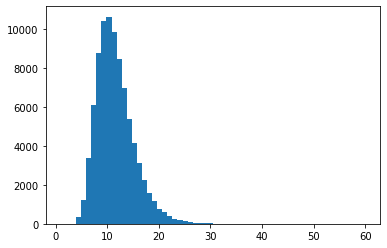

In [9]:
questions['word_number'].hist(grid=False, bins=max(questions['word_number']))

# First word in a question

(we could extract the first word and try grouping questions by the interrogative pronoun used)

In [10]:
# first word of a question
questions['first_word'] = questions['question'].str.split(expand=True)[0]

In [11]:
questions['first_word']

0          to
1        what
2         the
3        what
4        what
         ... 
86630      in
86631    what
86632    with
86633      in
86634    what
Name: first_word, Length: 86635, dtype: object

## 40 most popular first words

In [12]:
# most frequent types of questions
questions['first_word'].value_counts()[:40]

what         37479
who           8133
how           7897
when          5424
in            4313
which         4140
where         3257
the           2291
why           1188
on             589
along          577
during         436
at             336
a              316
for            292
according      290
to             288
from           278
by             255
after          247
whose          202
is             187
with           174
if             171
as             165
besides        163
are            158
name           148
did            146
about          143
do             126
of             125
does           124
under          111
was            107
other           91
some            82
beyonce         76
since           76
an              71
Name: first_word, dtype: int64